In [408]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squarify   

In [409]:
pokemon_df = pd.read_csv('assets\pokemon.csv')
pokemon_df.head (10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


cleaning the null values from the data

In [410]:
modifiedpokemon=pokemon_df.fillna('')

In [411]:
modifiedpokemon.isnull().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

Finding out what the weakest and strongest pokemon are.

In [412]:
cols = ['against_bug', 'against_dark', 'against_dragon','against_electric', 'against_fairy', 'against_fight', 'against_fire','against_flying', 'against_ghost', 'against_grass', 'against_ground','against_ice', 'against_normal', 'against_poison', 'against_psychic','against_rock', 'against_steel', 'against_water', 'attack','sp_attack']
modifiedpokemon['Total Strength'] = modifiedpokemon[cols].sum(axis=1)

In [413]:
strong = modifiedpokemon.sort_values(['Total Strength'],ascending=False)
print ('Strongest Pokemon')
strong['name'][0]


Strongest Pokemon


'Bulbasaur'

In [414]:
print('Weakest pokemon')
strong['name'][800]

Weakest pokemon


'Magearna'

anlyazing the data more in depth 

In [415]:
modifiedpokemon.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,defense,experience_growth,hp,pokedex_number,sp_attack,sp_defense,speed,generation,is_legendary,Total Strength
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,8.010000e+02,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,73.008739,1.054996e+06,68.958801,401.000000,71.305868,70.911361,66.334582,3.690387,0.087391,168.207553
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,30.769159,1.602558e+05,26.576015,231.373075,32.353826,27.942501,28.907662,1.930420,0.282583,53.380056
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,5.000000,6.000000e+05,1.000000,1.000000,10.000000,20.000000,5.000000,1.000000,0.000000,38.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,50.000000,1.000000e+06,50.000000,201.000000,45.000000,50.000000,45.000000,2.000000,0.000000,129.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,70.000000,1.000000e+06,65.000000,401.000000,65.000000,66.000000,65.000000,4.000000,0.000000,164.250000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,90.000000,1.059860e+06,80.000000,601.000000,91.000000,90.000000,85.000000,5.000000,0.000000,199.500000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,230.000000,1.640000e+06,255.000000,801.000000,194.000000,230.000000,180.000000,7.000000,1.000000,380.250000


In [416]:
modifiedpokemon.shape 

(801, 42)

In [417]:
modifiedpokemon.nunique()


abilities            482
against_bug            5
against_dark           5
against_dragon         4
against_electric       6
against_fairy          5
against_fight          6
against_fire           5
against_flying         5
against_ghost          5
against_grass          5
against_ground         6
against_ice            5
against_normal         4
against_poison         6
against_psychic        6
against_rock           5
against_steel          5
against_water          5
attack               114
base_egg_steps        10
base_happiness         6
base_total           203
capture_rate          34
classfication        588
defense              109
experience_growth      6
height_m              52
hp                    99
japanese_name        801
name                 801
percentage_male        8
pokedex_number       801
sp_attack            111
sp_defense            97
speed                113
type1                 18
type2                 19
weight_kg            422
generation             7


Next is a graph showing how many pokemon were added with the release of each generation 

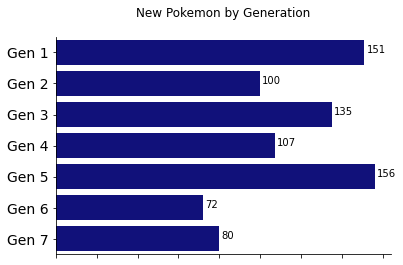

In [418]:
generations = [f'Gen {g}' for g in modifiedpokemon.generation.unique()]

ax = sns.countplot(y=modifiedpokemon.generation, orient='h', color='darkblue')

ax.set_xlabel(xlabel='')
ax.set_xticklabels([])
ax.set_ylabel(ylabel='')
ax.set_yticklabels(generations, size=14)
ax.set_facecolor('white')
ax.set_title('New Pokemon by Generation', loc='center', pad=20)

sns.despine( right=True)

for index, value in enumerate(modifiedpokemon.generation.value_counts().sort_index()): 
    plt.annotate(f'{value}', xy=(value + 1, index), color='black') 

visualzing the types of pokemon with charts both primary and secondary types 

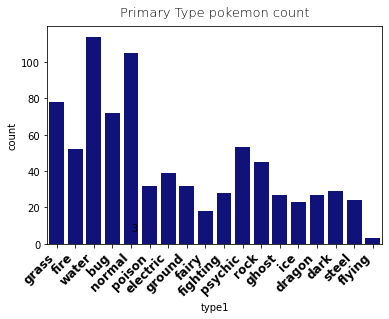

In [419]:

type = ['type (t)' for t in pokemon_df.type1.unique()]
ax = sns.countplot(x=pokemon_df.type1 , color='darkblue')
ax.set_title('Primary Type pokemon count', loc='center', pad=10, weight= 10 , fontsize=13  )

plt.xticks(
     rotation=45, 
    horizontalalignment='right',
    fontweight='heavy',
    fontsize='large'
)
for index, value in enumerate(pokemon_df.type1.value_counts().sort_index()): 
    plt.annotate(f'{value}', xy=(value + 1, index), color='black') 

Text(0.5, 1.0, 'Secondary type pokemon count')

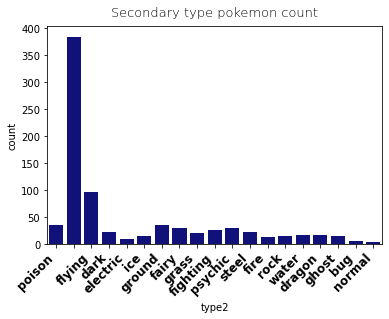

In [420]:
type2 = [f'type (t)' for t in modifiedpokemon.type2.unique()]
ax = sns.countplot(x=modifiedpokemon.type2 , color='darkblue')

plt.xticks(
     rotation=45, 
    horizontalalignment='right',
    fontweight='heavy',
    fontsize='large'
)
ax.set_title('Secondary type pokemon count', loc='center', pad=10, weight= 15 , fontsize=13  )



In [421]:
type1_value_counts = pokemon_df['type1'].value_counts()

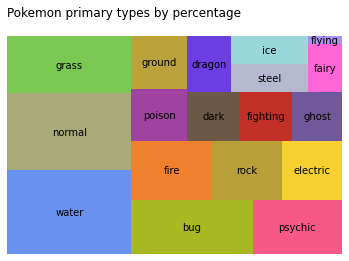

In [422]:
palette = ['#6991F0', '#A8AA79', '#7AC852', '#A7B822', '#F85887', '#EF812E', '#B99F38', '#F6D030', '#A0429F', 
           '#BCA23B', '#6D5947', '#C12F27', '#70589A', '#6B3EE3', '#B6B8D0', '#9AD7D9', '#FF65D5', '#A991F0']
ax = squarify.plot(type1_value_counts, 
              label=type1_value_counts.index,
              color=palette,
              pad=0,
              text_kwargs={'fontsize': 10 , 'color': 'black'})
ax.set_title('Pokemon primary types by percentage ', loc='left', pad=20)
ax.figure
plt.axis('off');